Exercises
========================

In [154]:
import pandas as pd
data = pd.DataFrame([[0,0,1],[0,1,1.5],[1,0,1.75],[1,1,2.25]],columns=['X1','X2','t'])
data

,X1,X2,t
0,0,0,1.00
1,0,1,1.50
2,1,0,1.75
3,1,1,2.25


In [155]:
X = data.iloc[:,:2]
X

,X1,X2
0,0,0
1,0,1
2,1,0
3,1,1


Because this is a learning exercise, here are the answers we are going to hunt for using gradient descent. In other words, your last theta should be w and b given below.

In [156]:
import numpy as np
w = np.array([0.75,0.5])
b = 1
y = np.dot(X,w)+b
y

array([1.  , 1.5 , 1.75, 2.25])

Our y functions are:

$y_1 = 0*w_1+0*w_2+b$

$y_2 = 0*w_1+1*w_2+b$

$y_3 = 1*w_1+0*w_2+b$

$y_4 = 1*w_1+1*w_2+b$

Our Loss functions are:

$L_1 = (b - 1)^2$

$L_2 = (1*w_2+b - 1.5)^2$

$L_3 = (1*w_1+b - 1.75)^2$

$L_4 = (1*w_1+1*w_2+b - 2.25)^2$

Our derivatives are:

$\frac{\delta L_1}{\delta w1} = 0$

$\frac{\delta L_2}{\delta w1} = 0$

$\frac{\delta L_3}{\delta w1} = 2(w_1+b-1.75)$

$\frac{\delta L_4}{\delta w1} = 2(w_1+w_2+b-2.25)$

$\frac{\delta L_1}{\delta w2} = 0$

$\frac{\delta L_2}{\delta w2} = 2(w_2+b-1.5)$

$\frac{\delta L_3}{\delta w2} = 0$

$\frac{\delta L_4}{\delta w2} = 2(w_1+w_2+b-2.25)$

$\frac{\delta L_1}{\delta b} = 2(b-1)$

$\frac{\delta L_2}{\delta b} = 2(w_2+b-1.5)$

$\frac{\delta L_3}{\delta b} = 2(w_1+b-1.75)$

$\frac{\delta L_4}{\delta b} = 2(w_1+w_2+b-2.25)$

## Gradient descent

Our first take on gradient descent will assume you can symbolically find the gradient of a function. So you can use the derivatives I supplied above:

Gradient descent says:

$w_1 = w_1 - \alpha \frac{1}{4} \left(\sum_{i=1}^4\frac{dF_i}{dw_1}\right)$

$w_2 = w_2 - \alpha \frac{1}{4} \left(\sum_{i=1}^4\frac{dF_i}{dw_2}\right)$

$b = b - \alpha \frac{1}{4} \left(\sum_{i=1}^4\frac{dF_i}{db}\right)$

We will set $\alpha=0.1$.

We will now define the derivatives programmatically:

In [157]:
import random
gradients_w1 = [lambda w1,w2,b: 0, lambda w1,w2,b: 0, lambda w1,w2,b: 2*(w1+b-1.75), lambda w1,w2,b: 2*(w1+w2+b-2.25)]
print('This should be all zeros:',[gradients_w1[i](0.75,0.5,1) for i in range(4)])
print('This should be non-zero:',[gradients_w1[i](0.75-random.random(),0.5-random.random(),1-random.random()) for i in range(4)])
print('This should be non-zero:',[gradients_w1[i](0.75+random.random(),0.5+random.random(),1+random.random()) for i in range(4)])

This should be all zeros: [0, 0, 0.0, 0.0]
This should be non-zero: [0, 0, -3.1287056115527556, -1.6429550305910006]
This should be non-zero: [0, 0, 3.4538158500120684, 2.646630840469948]


In [158]:
import random
gradients_w2 = [lambda w1,w2,b: 0, lambda w1,w2,b: 2*(w2+b-1.5), lambda w1,w2,b: 0, lambda w1,w2,b: 2*(w1+w2+b-2.25)]
print('This should be all zeros:',[gradients_w2[i](0.75,0.5,1) for i in range(4)])
print('This should be non-zero:',[gradients_w2[i](0.75-random.random(),0.5-random.random(),1-random.random()) for i in range(4)])
print('This should be non-zero:',[gradients_w2[i](0.75+random.random(),0.5+random.random(),1+random.random()) for i in range(4)])

This should be all zeros: [0, 0.0, 0, 0.0]
This should be non-zero: [0, -1.2804335703102692, 0, -3.258550017052838]
This should be non-zero: [0, 2.206282228539724, 0, 2.5970123867346846]


In [159]:
import random
gradients_b = [lambda w1,w2,b: 2*(b-1), lambda w1,w2,b: 2*(w2+b-1.5), lambda w1,w2,b: 2*(w2+b-1.5), lambda w1,w2,b: 2*(w1+w2+b-2.25)]
print('This should be all zeros:',[gradients_b[i](0.75,0.5,1) for i in range(4)])
print('This should be non-zero:',[gradients_b[i](0.75-random.random(),0.5-random.random(),1-random.random()) for i in range(4)])
print('This should be non-zero:',[gradients_b[i](0.75+random.random(),0.5+random.random(),1+random.random()) for i in range(4)])

This should be all zeros: [0, 0.0, 0.0, 0.0]
This should be non-zero: [-1.6547859803062728, -3.0986214883171455, -0.9281735260625572, -3.7664915165624118]
This should be non-zero: [1.0219955738071422, 1.1687255725321206, 1.792809626116501, 3.912904293431964]


In [160]:
import gradient_descent
thetas = gradient_descent.minimize_gradient_descent([gradients_w1,gradients_w2,gradients_b],0.1,[0.5,-0.2,2.5])
pd.Series(thetas)
# please note that I only add the pd.Series, so the output is nicely formatted

0                                       [0.5, -0.2, 2.5]
1                 [0.41000000000000003, -0.2675, 2.3175]
2                          [0.350625, -0.3055, 2.186125]
3                    [0.312225, -0.32359375, 2.08969375]
4      [0.28821281249999997, -0.328315, 2.01718281249...
                             ...                        
496    [0.7499998348770656, 0.49999983487304656, 1.00...
497    [0.7499998400594908, 0.4999998400556728, 1.000...
498    [0.7499998450792664, 0.4999998450756393, 1.000...
499    [0.749999849941497, 0.4999998499380513, 1.0000...
500    [0.7499998546511271, 0.4999998546478536, 1.000...
Length: 501, dtype: object

In [161]:
print('This should be all zeros, but is it...:',[gradients_w1[i](0.75,0.5,1) for i in range(4)])
print('This should be all zeros, but is it...:',[gradients_w2[i](0.75,0.5,1) for i in range(4)])
print('This should be all zeros, but is it...:',[gradients_b[i](0.75,0.5,1) for i in range(4)])

This should be all zeros, but is it...: [0, 0, 0.0, 0.0]
This should be all zeros, but is it...: [0, 0.0, 0, 0.0]
This should be all zeros, but is it...: [0, 0.0, 0.0, 0.0]


In [162]:
import numpy as np
w_predicted = np.array(thetas[-1][:2])
b_predicted = thetas[-1][-1]
y = np.dot(X,w_predicted)+b_predicted
y

array([1.00000017, 1.50000003, 1.75000003, 2.24999988])

Now what if you can't or don't want to find the derivatives symbolically? 
You can always estimate the gradient analytically using the difference quotient:

$[L(\theta+h)-L(\theta)]/h$,

where h is a scalar parameter. Let's give it a shot with our functions. As a reminder, they are:

$L_1 = (b - 1)^2$

$L_2 = (1*w_2+b - 1.5)^2$

$L_3 = (1*w_1+b - 1.75)^2$

$L_4 = (1*w_1+1*w_2+b - 2.25)^2$

In [163]:
F1_func = lambda w1,w2,b: (b-1)**2
F1_func(w[0],w[1],b)

0

In [164]:
F2_func = lambda w1,w2,b: (w2+b-1.5)**2
F2_func(w[0],w[1],b)

0.0

In [165]:
F3_func = lambda w1,w2,b: (w1+b-1.75)**2
F3_func(w[0],w[1],b)

0.0

In [166]:
F4_func = lambda w1,w2,b: (w1+w2+b-2.25)**2
F4_func(w[0],w[1],b)

0.0

In [167]:
R_func = lambda w1,w2,b: 1/4*(F1_func(w1,w2,b)+F2_func(w1,w2,b)+F3_func(w1,w2,b)+F4_func(w1,w2,b))
R_func(w[0],w[1],b)

0.0

In [168]:
thetas = gradient_descent.minimize_gradient_descent_analytically(R_func,0.1,[0.5,-0.2,2.5],0.01)
pd.Series(thetas)

0                                       [0.5, -0.2, 2.5]
1      [0.4095000000000022, -0.2680000000000014, 2.29...
2      [0.3520500000000022, -0.3040750000000035, 2.14...
3      [0.3170437500000002, -0.3187750000000043, 2.03...
4      [0.29725387500000044, -0.31927393750000405, 1....
                             ...                        
496    [0.7499998915095999, 0.49999989150558083, 0.99...
497    [0.749999894914635, 0.4999998949108169, 0.9950...
498    [0.7499998982128018, 0.4999998982091746, 0.995...
499    [0.7499999014074543, 0.49999990140400846, 0.99...
500    [0.7499999045018414, 0.4999999044985678, 0.995...
Length: 501, dtype: object

In [169]:
R_func(*thetas[-1]) # Shouldn't be too bad :)

2.4999822240924255e-05

In [170]:
# Good job!
# Woohoo!

# Run Tests

In [171]:
%%bash

#pytest test_Assignment4.py

In [172]:
# Now test the efficiency of each algorithm

In [173]:
extra_rows = 16  # number of rows in dataset
new_data = pd.DataFrame(np.random.rand(extra_rows, 3), columns=['X1', 'X2', 't'])

large_data = pd.concat([data, new_data], ignore_index=True)

#large_data

In [174]:
# calculate loss functions/gradients

X = large_data.iloc[:,:2]

w = np.array([0.75,0.5])
b = 1
y = np.dot(X,w)+b
y # expected results from plugging in w1, w2 and b into equations


array([1.        , 1.5       , 1.75      , 2.25      , 1.55156862,
       1.38967602, 1.88185694, 1.74385132, 1.84441468, 1.60604017,
       1.4099346 , 1.62385938, 1.32229367, 1.85089256, 1.81503873,
       1.76349357, 1.2167551 , 2.15369753, 1.4604366 , 1.94659738])

In [175]:

# Loss function Ln = (X1[n] * w1 + X2[n] * w2 + b - y[n])^2

# dLn/dw1 = dLn/dw2 = dLn/db = 2(X1[n] * w1 + X2[n] * w2 + b - y[n])
def gradient_w1(row, w1, w2, b):
    return 2 * (row['X1'] * w1 + row['X2'] * w2 + b - row['t']) * row['X1']

def gradient_w2(row, w1, w2, b):
    return 2 * (row['X1'] * w1 + row['X2'] * w2 + b - row['t']) * row['X2']

def gradient_b(row, w1, w2, b):
    return 2 * (row['X1'] * w1 + row['X2'] * w2 + b - row['t'])

# Generate gradient lambda functions
gradients_w1 = [
    lambda w1=w[0], w2=w[1], b=b, row=row: 2 * (row['X1'] * w1 + row['X2'] * w2 + b - row['t']) * row['X1']
    for _, row in large_data.iterrows()
]

gradients_w2 = [
    lambda w1=w[0], w2=w[1], b=b, row=row: 2 * (row['X1'] * w1 + row['X2'] * w2 + b - row['t']) * row['X2']
    for _, row in large_data.iterrows()
]

gradients_b = [
    lambda w1=w[0], w2=w[1], b=b, row=row: 2 * (row['X1'] * w1 + row['X2'] * w2 + b - row['t'])
    for _, row in large_data.iterrows()
]

# Example of evaluating the first few gradient functions
print("Gradients for w1:", [grad(w[0], w[1], b) for grad in gradients_w1])
print("Gradients for w2:", [grad(w[0], w[1], b) for grad in gradients_w2])
print("Gradients for b:", [grad(w[0], w[1], b) for grad in gradients_b])


Gradients for w1: [0.0, 0.0, 0.0, 0.0, 1.1415262165014788, 0.3254012945995181, 1.4097435699847698, 1.7772726831207695, 1.9474974078214613, 1.2988474404419639, 0.1218922231638888, 1.0889378015781574, 0.7485973806700613, 1.5523024746132263, 1.2830753453641113, 1.6039812433859784, 0.06492062978539338, 3.2709653019012865, 0.9544630025291895, 2.8643911587434068]
Gradients for w2: [0.0, 0.0, 0.0, 0.0, 1.2973659320134538, 0.18343488324289475, 1.7847699936389514, 1.73374859806958, 2.296003121865564, 0.6202112381493882, 1.4887409368509665, 0.875089383756513, 0.4860806409297037, 1.0840106632426252, 2.8953203817701803, 0.12480122021526802, 0.10317982218661081, 3.1049268907328145, 0.029910646074350577, 2.987020875064619]
Gradients for b: [0.0, 0.0, 0.0, 0.0, 2.728269125488396, 0.8616604526525593, 2.210894525597248, 2.9573501475180954, 3.0892696217723072, 2.119069419192137, 2.0388365189592426, 2.0104659567997856, 2.4961345572476707, 2.005226355781753, 2.9568738554889418, 1.65736372017978, 0.4626437

In [204]:
# test new dataset
import gradient_descent
import time

def test_algorithm(name, function, gradients, learning_rate, start_vals, tol, max_iter, print=False):
    if print:
        print(f"Running {name}...\n --")
    start_time = time.time()
    thetas = function([gradients_w1,gradients_w2,gradients_b],learning_rate,start_vals, tol, max_iter)
    end_time = time.time()
    exec_time = time.time() - start_time
    if print:
        print(" -- execution time: {:.4f} seconds".format(exec_time))
    values = pd.Series(thetas)
    num_iter = len(values)
    if print:
        print(" -- iterations:", num_iter, " --")
    return [num_iter, exec_time]
    

In [227]:
# variables 
learning_rate = 0.1
start_vals = [0.5, -0.2, 2.5]
tol = 1e-3
max_iter = 100000
print_val = False

values_gd, values_sgd, values_adam = [],[],[]

for i in range(50):
    if i%10 == 0 or print_val == True:
        print("Test",i)
    values_gd.append(test_algorithm("Gradient Descent", gradient_descent.minimize_gradient_descent, [gradients_w1, gradients_w2, gradients_b], learning_rate, start_vals, tol, max_iter, print_val))
    values_sgd.append(test_algorithm("Stochastic Gradient Descent", gradient_descent.minimize_stochastic_gradient_descent, [gradients_w1, gradients_w2, gradients_b], learning_rate, start_vals, tol, max_iter, print_val))
    values_adam.append(test_algorithm("Adam Optimizer", gradient_descent.minimize_sgd_adam, [gradients_w1, gradients_w2, gradients_b], learning_rate, start_vals, tol, max_iter, print_val))


Test 0
Test 10
Test 20
Test 30
Test 40


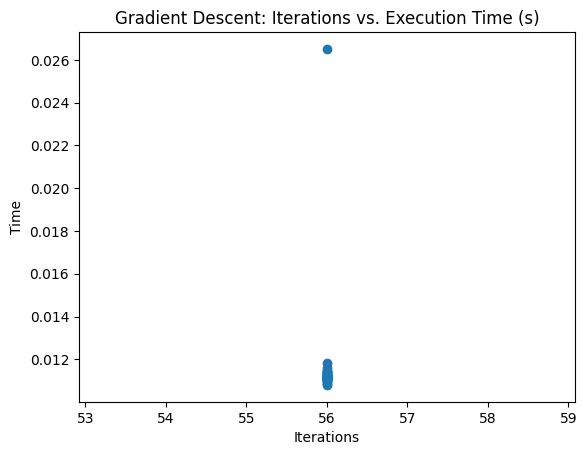

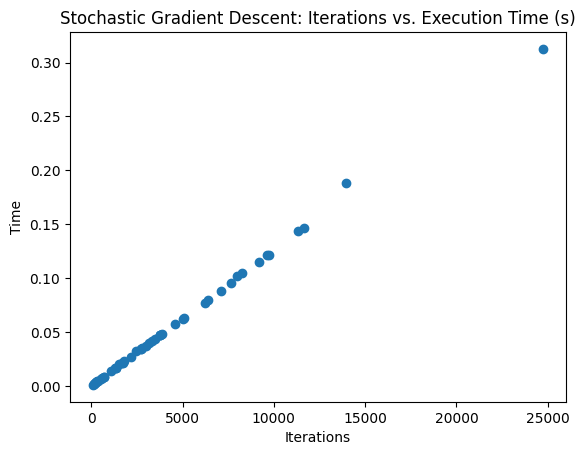

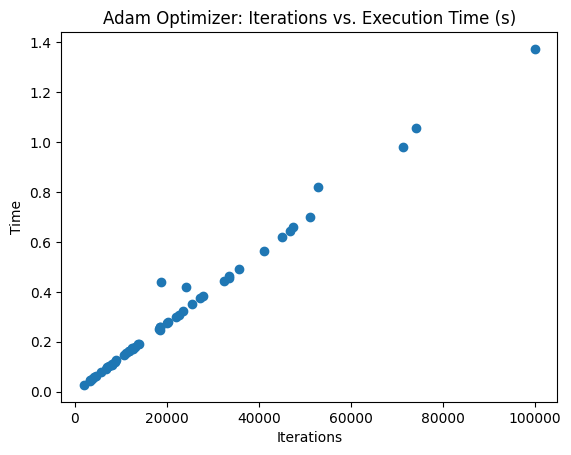

In [228]:
import matplotlib.pyplot as plt

def plot_data(data, name):
    x_values = [item[0] for item in data]
    y_values = [item[1] for item in data]
    
    plt.scatter(x_values, y_values)
    
    plt.xlabel('Iterations')
    plt.ylabel('Time')
    plt.title(f'{name}: Iterations vs. Execution Time (s)')
    return plt
    
plt_gd = plot_data(values_gd, "Gradient Descent")
plt_gd.show()
plt_sgd = plot_data(values_sgd, "Stochastic Gradient Descent")
plt_sgd.show()
plt_adam = plot_data(values_adam, "Adam Optimizer")
plt_adam.show()


In [239]:
# Clearly, there is a linear relationship between time and number of iterations. Now to compare the averages for each algorithm:

def print_averages(data, name):
    print(name)
    i = 0
    iter = 0
    time = 0
    for value in data:
        i += 1
        iter += value[0]
        time += value[1]
    avg_t = time/i
    print(f'-- average time (s): {avg_t:.4f}')
    avg_i = iter/i
    print(f'-- average iter: {avg_i:.0f}')
    print(f'-- time/iter (s): {(avg_t / avg_i):.4e}')

print_averages(values_gd, "Gradient Descent")
print("
print_averages(values_sgd, "Stochastic Gradient Descent")
print_averages(values_adam, "Adam Optimizer")

Gradient Descent
-- average time (s): 0.0115
-- average iter: 56
-- time/iter (s): 2.0516e-04
Stochastic Gradient Descent
-- average time (s): 0.0519
-- average iter: 4116
-- time/iter (s): 1.2615e-05
Adam Optimizer
-- average time (s): 0.3282
-- average iter: 23293
-- time/iter (s): 1.4088e-05


# Push code to repo

In [58]:
%%bash 

git add .
git commit -m "update"
git push

[main 9911ec2] update
 8 files changed, 17 insertions(+), 17 deletions(-)


To https://github.com/michaelmurrayiv/stochastic-gradient-descent.git
   db88ea6..9911ec2  main -> main
